In [109]:
from projects.NeuralForceField.train import *
from projects.NeuralForceField.graphs import * 
import numpy as np

In [110]:
data = pickle.load(open('/home/wwj/data/lipoly/COC_NMS.pkl', "rb" ) )

xyz_data = []
force_data = []
energy_data = []
smiles_data = []

for item in data:
    xyz_data.append(item[0]) 
    force_data.append(item[1])
    energy_data.append(item[2])
    smiles_data.append(item[3])

In [111]:
# initialize parameters
par = dict()

par["git_commit"] = "9129a434b318ab26ee890281f531f304fb499ca7"
par["model_type"] = "schnet"
par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 10
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 1000
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-4

graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, smiles_data=smiles_data,
                             batch_size=par["batch_size"], cutoff=par["cutoff"], 
                             force_data=force_data, au_flag=True, subtract_mean_flag = True)

Finished finalizing batch 1 of 110.
Finished finalizing batch 2 of 110.
Finished finalizing batch 3 of 110.
Finished finalizing batch 4 of 110.
Finished finalizing batch 5 of 110.
Finished finalizing batch 6 of 110.
Finished finalizing batch 7 of 110.
Finished finalizing batch 8 of 110.
Finished finalizing batch 9 of 110.
Finished finalizing batch 10 of 110.
Finished finalizing batch 11 of 110.
Finished finalizing batch 12 of 110.
Finished finalizing batch 13 of 110.
Finished finalizing batch 14 of 110.
Finished finalizing batch 15 of 110.
Finished finalizing batch 16 of 110.
Finished finalizing batch 17 of 110.
Finished finalizing batch 18 of 110.
Finished finalizing batch 19 of 110.
Finished finalizing batch 20 of 110.
Finished finalizing batch 21 of 110.
Finished finalizing batch 22 of 110.
Finished finalizing batch 23 of 110.
Finished finalizing batch 24 of 110.
Finished finalizing batch 25 of 110.
Finished finalizing batch 26 of 110.
Finished finalizing batch 27 of 110.
Finished f

In [55]:
# generate species by id from the first two batches 
species_dict = {}

name_list = []
r_list = []
xyz_list = []

for i in range(3):
    batch = graph_data.batches[i]
    
    xyz_list += list( torch.split(batch.data["xyz"], batch.data["N"]) )
    name_list += batch.data["name"]
    

for index, geom in enumerate(xyz_list):
    if name_list[index] not in species_dict:
        species_dict[name_list[index]] = [index]
    else:
        species_dict[name_list[index]].append(index)

In [72]:
def parse_species_geom(n_batch, graph_data):
    
    species_dict = {}

    name_list = []
    r_list = []
    xyz_list = []

    for i in range(n_batch):
        batch = graph_data.batches[i]

        xyz_list += list( torch.split(batch.data["xyz"], batch.data["N"]) )
        r_list += list(torch.split(batch.data["r"], batch.data["N"]))
        name_list += batch.data["name"]

    for index, geom in enumerate(xyz_list):
        if name_list[index] not in species_dict:
            species_dict[name_list[index]] = [index]
        else:
            species_dict[name_list[index]].append(index)
    
    return species_dict, r_list, xyz_list

In [73]:
species_dict, r_list, xyz_list = parse_species_geom(3, graph_data)

In [74]:
for species in species_dict:
    
    index = np.random.choice(species_dict[species])
    
    xyz = xyz_list[index]
    r = r_list[index][:, 0]

In [94]:
data = pickle.load(open('/home/wwj/data/lipoly/COCCOC.[Li+]_neural.pkl', "rb" ) )

xyz_data = []
force_data = []
energy_data = []
smiles_data = []

for item in data:
    xyz_data.append(item[0]) 
    force_data.append(item[1])
    energy_data.append(item[2])
    smiles_data.append(item[3])

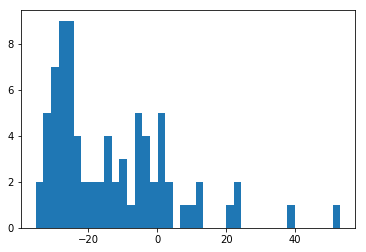

In [95]:
plt.hist(np.array(energy_data) * 627.509, bins = 40)
plt.show()

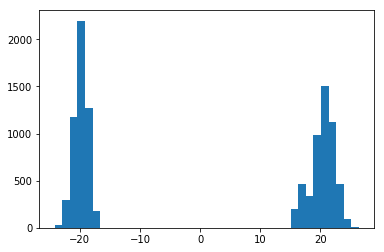

In [84]:
data = pickle.load(open('/home/wwj/data/lipoly/COCCOC.[Li+]_NMS.pkl', "rb" ) )

xyz_data = []
force_data = []
energy_data = []
smiles_data = []

for item in data:
    xyz_data.append(item[0]) 
    force_data.append(item[1])
    energy_data.append(item[2])
    smiles_data.append(item[3])
    
plt.hist(np.array(energy_data) * 627.509, bins = 40)
plt.show()

In [90]:
cluster_energy = []

for i, xyz in enumerate(xyz_data):
    if len(xyz) == 17:
        cluster_energy.append(energy_data[i])

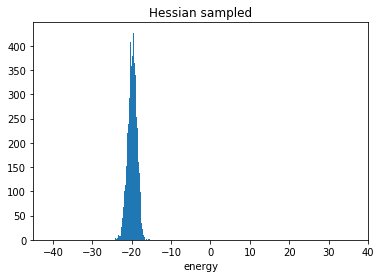

In [108]:
plt.hist(np.array(cluster_energy) * 627.509, bins =40)
plt.xlim(-45, 40)
#plt.hist(np.array(energy_data) * 627.509, bins = 100)
plt.title("Hessian sampled")
plt.xlabel("energy")
plt.show()

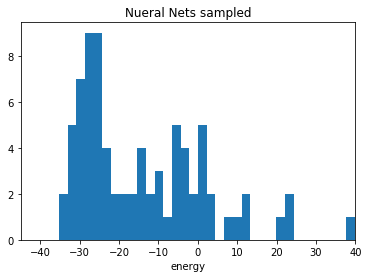

In [107]:
plt.hist(np.array(energy_data) * 627.509, bins = 40)
plt.xlim(-45, 40)
plt.title("Nueral Nets sampled")
plt.xlabel("energy")
plt.show()